# Data Exploration

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


In [2]:
# ML Libraries
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Notebook Settings
%matplotlib inline
path = r'D:\2021 CareerFoundry Course\Immersion\A6 Project'

In [4]:
cov = pd.read_csv(os.path.join(path, '02 Data', 'Processed', 'cov_processed.csv'), index_col = 0)
inc = pd.read_csv(os.path.join(path, '02 Data', 'Processed', 'incomes.csv'), index_col = 0)



In [5]:
cov['date'] = cov['date'].astype('datetime64[ns]')

In [6]:
inc.reset_index(inplace = True)
inc.drop(columns = ['index'], inplace = True)

In [7]:
drop = ['North Korea']
cov = cov[cov.location.isin(drop) == False]

In [8]:
cov.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,year_month
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,2,2020-02-01
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,2,2020-02-01


In [9]:
inc.head(2)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,year,month,year_month
0,OWID_HIC,High,2020-01-22,6.0,0.0,NaN,NaN,0.0,NaN,0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,1.250515e+09,2020,1,2020-01-01
1,OWID_HIC,High,2020-01-23,12.0,6.0,NaN,NaN,0.0,NaN,0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,1.250515e+09,2020,1,2020-01-01


In [10]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225719 entries, 0 to 240170
Data columns (total 70 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    225719 non-null  object        
 1   continent                                   225719 non-null  object        
 2   location                                    225719 non-null  object        
 3   date                                        225719 non-null  datetime64[ns]
 4   total_cases                                 212676 non-null  float64       
 5   new_cases                                   212289 non-null  float64       
 6   new_cases_smoothed                          211160 non-null  float64       
 7   total_deaths                                193497 non-null  float64       
 8   new_deaths                                  193228 non-null  float64      

In [11]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4160 entries, 0 to 4159
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    4160 non-null   object 
 1   location                                    4160 non-null   object 
 2   date                                        4160 non-null   object 
 3   total_cases                                 4158 non-null   float64
 4   new_cases                                   4160 non-null   float64
 5   new_cases_smoothed                          4140 non-null   float64
 6   total_deaths                                4122 non-null   float64
 7   new_deaths                                  4160 non-null   float64
 8   new_deaths_smoothed                         4140 non-null   float64
 9   total_cases_per_million                     4158 non-null   float64
 10  new_cases_pe

## Case Fatality Rate

In [12]:
cfr_grp = (
cov
.groupby(by=['location', 'iso_code'])
.agg({
'total_cases': [np.max], 
'total_deaths':[np.max],
'total_tests':[np.max],
'total_cases_per_million': [np.max], 
'new_cases_per_million': [np.mean],
'total_deaths_per_million': [np.max], 
'new_deaths_per_million': [np.mean],
'stringency_index': [np.max], 
'population_density': [np.max], 
'median_age': [np.max], 
'aged_65_older': [np.max],
'aged_70_older': [np.max], 
'gdp_per_capita': [np.max], 
'extreme_poverty': [np.max],
'cardiovasc_death_rate': [np.max], 
'diabetes_prevalence': [np.max], 
'female_smokers': [np.max],
'male_smokers': [np.max], 
'handwashing_facilities': [np.max], 
'hospital_beds_per_thousand': [np.max],
'life_expectancy': [np.max], 
'human_development_index': [np.max],
'total_tests': [np.max],
'new_tests': [np.max],  
'total_tests_per_thousand': [np.max],
'total_vaccinations_per_hundred': [np.max]
})
.pipe(lambda x: x.set_axis(x.columns.map('_'.join), axis=1))
.reset_index()
)


In [13]:
cfr_grp['cfr'] = (cfr_grp['total_deaths_amax'] / cfr_grp['total_cases_amax'])*100

In [14]:
cfr_grp.columns = cfr_grp.columns.str.replace(r'_amax', '')
cfr_grp.head(2)

,location,iso_code,total_cases,total_deaths,total_tests,total_cases_per_million,new_cases_per_million_mean,total_deaths_per_million,new_deaths_per_million_mean,stringency_index,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,new_tests,total_tests_per_thousand,total_vaccinations_per_hundred,cfr
0,Afghanistan,AFG,206206.0,7834.0,994894.0,5013.668,4.949531,190.475,0.192976,84.26,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,24.811,29.85,3.799114
1,Albania,ALB,333408.0,3594.0,1613870.0,117301.442,117.184269,1264.461,1.265717,89.81,...,7.1,51.2,NaN,2.89,78.57,0.795,8746.0,565.336,105.95,1.077959


In [15]:
cfr_grp.sort_values('handwashing_facilities', ascending = False)

,location,iso_code,total_cases,total_deaths,total_tests,total_cases_per_million,new_cases_per_million_mean,total_deaths_per_million,new_deaths_per_million_mean,stringency_index,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,new_tests,total_tests_per_thousand,total_vaccinations_per_hundred,cfr
213,Turkmenistan,TKM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.00,...,NaN,NaN,100.000,7.400,68.19,0.715,NaN,NaN,210.15,NaN
105,Kazakhstan,KAZ,1487167.0,19053.0,11965068.0,76666.004,80.423057,982.215,1.014999,92.13,...,7.0,43.1,98.999,6.700,73.60,0.825,148586.0,623.295,107.84,1.281161
183,Serbia,SRB,2425445.0,17404.0,9852899.0,352969.280,351.563030,2532.763,2.561449,100.00,...,37.7,40.2,97.719,5.609,76.00,0.806,39740.0,1433.869,124.20,0.717559
155,Oman,OMN,399119.0,4628.0,2031675.0,87214.343,85.925451,1011.297,0.951891,100.00,...,0.5,15.6,97.400,1.600,77.86,0.813,NaN,449.439,154.84,1.159554
25,Bosnia and Herzegovina,BIH,400572.0,16203.0,1499302.0,123880.712,123.264388,5010.932,5.083847,92.59,...,30.2,47.7,97.164,3.500,77.40,0.780,16699.0,458.370,59.53,4.044966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Vatican,VAT,29.0,NaN,NaN,35891.089,35.748099,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75.12,NaN,NaN,NaN,NaN,NaN
226,Venezuela,VEN,547772.0,5829.0,NaN,19354.738,19.452002,205.959,0.209945,97.22,...,NaN,NaN,NaN,0.800,72.06,0.711,NaN,NaN,133.78,1.064129
228,Wales,OWID_WLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.11,NaN
229,Wallis and Futuna,WLF,3415.0,7.0,NaN,294498.103,379.019444,603.656,0.967401,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,154.87,0.204978


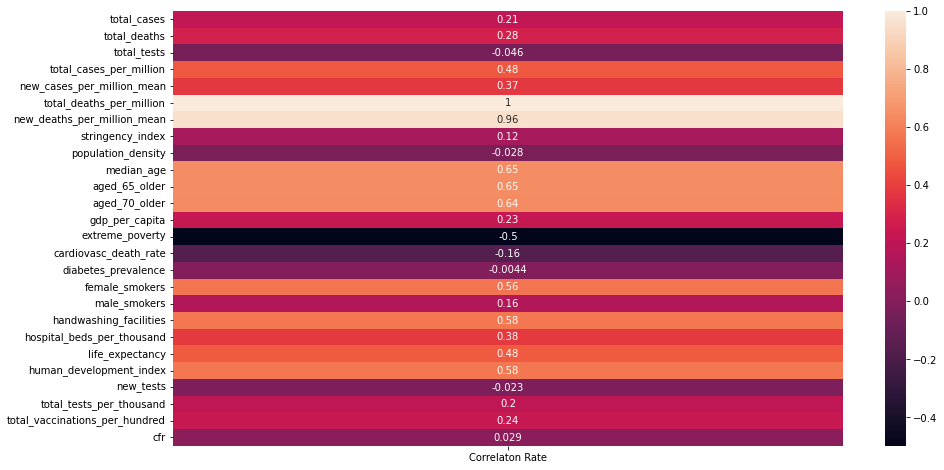

In [16]:
fig, ax = plt.subplots()
heatmap_cfr_soc = pd.DataFrame({'Correlaton Rate':cfr_grp.corr()['total_deaths_per_million'].values}, 
                            index = cfr_grp.corr()['total_deaths_per_million'].index)
deaths_mil_heat = sns.heatmap(heatmap_cfr_soc, yticklabels=True, annot = True)
fig.set_size_inches(15,8)
plt.show()

In [17]:
deaths_mil_corr = pd.DataFrame({'Correlaton Rate':cfr_grp.corr()['total_deaths_per_million'].values}, 
                            index = cfr_grp.corr()['total_deaths_per_million'].index)
deaths_mil_corr.to_csv(os.path.join(path, '02 Data', 'Processed', 'death_mil_corr.csv'))

In [18]:
deaths_mil_heat.figure.savefig(os.path.join(path, '04 Visuals', 'deaths_per_million_heatmap.png'))

# Top 10 Countries

### Cases and Deaths

#### Totals - raw volume

In [19]:
# This groupby method to get around the multi-index/columns issue was found @
#https://stackoverflow.com/questions/26323926/pandas-groupby-agg-how-to-return-results-without-the-multi-index
totals = (
cov
.groupby(by=['location', 'iso_code'])
.agg({
'total_cases': [np.max], 
'total_deaths':[np.max],
'total_tests':[np.max],
'population':[np.max]})
.pipe(lambda x: x.set_axis(x.columns.map('_'.join), axis=1))
.reset_index()
)

In [20]:
totals.columns

Index(['location', 'iso_code', 'total_cases_amax', 'total_deaths_amax',
       'total_tests_amax', 'population_amax'],
      dtype='object')

In [21]:
totals.rename(columns = {'total_cases_amax':'total_cases', 'total_deaths_amax':'total_deaths',
                              'total_tests_amax':'total_tests', 'population_amax' : 'population'},
              inplace = True)

In [22]:
t10_cases = totals.sort_values(['total_cases'],ascending=False)[0:10]
t10_deaths = totals.sort_values(['total_deaths'],ascending=False)[0:10]

#### Rates - per million
If we don't exclude small countries (less than 1 million total population) from the dataset, we may wind up with skewed measurements  

note: in hindsight this didn't change much except a couple very small islands with populations <100k

In [23]:
cov_pop_filter = cov.loc[cov['population'] > 10000000]

In [24]:
totals_rate = (
cov_pop_filter
.groupby(by=['location', 'iso_code'])
.agg({
'total_cases_per_million': [np.max], 
'total_deaths_per_million':[np.max],
'total_tests_per_thousand':[np.max],
'population':[np.max]})
.pipe(lambda x: x.set_axis(x.columns.map('_'.join), axis=1))
.reset_index()
)

In [25]:
totals_rate

,location,iso_code,total_cases_per_million_amax,total_deaths_per_million_amax,total_tests_per_thousand_amax,population_amax
0,Afghanistan,AFG,5013.668,190.475,24.811,41128772.0
1,Algeria,DZA,6037.584,153.241,5.219,44903228.0
2,Angola,AGO,2941.246,54.062,46.910,35588996.0
3,Argentina,ARG,214014.209,2857.242,809.775,45510324.0
4,Australia,AUS,410828.611,620.535,2830.525,26177410.0
...,...,...,...,...,...,...
88,Venezuela,VEN,19354.738,205.959,NaN,28301700.0
89,Vietnam,VNM,117304.112,439.743,880.538,98186856.0
90,Yemen,YEM,354.487,64.072,10.216,33696612.0
91,Zambia,ZMB,16672.570,200.773,180.456,20017670.0


In [26]:
totals_rate.columns

Index(['location', 'iso_code', 'total_cases_per_million_amax',
       'total_deaths_per_million_amax', 'total_tests_per_thousand_amax',
       'population_amax'],
      dtype='object')

In [27]:
totals_rate.rename(columns = {'total_cases_per_million_amax':'total_cases_per_mil', 
                              'total_deaths_per_million_amax':'total_deaths_per_mil',
                              'total_tests_per_thousand_amax':'total_tests_per_thousand',
                              'population_amax' : 'population'},inplace = True)

In [28]:
t10_cases_norm = totals_rate.sort_values(['total_cases_per_mil'],ascending=False)[0:10]
t10_deaths_norm = totals_rate.sort_values(['total_deaths_per_mil'],ascending=False)[0:10]

### Tests

In [29]:
total_tests = totals.loc[totals['total_tests'].isnull() == False]
total_testrate = totals_rate.loc[totals_rate['total_tests_per_thousand'].isnull() == False]

In [30]:
t10_tests = total_tests.sort_values(['total_tests'], ascending=False)[0:10]
t10_testrate = total_testrate.sort_values(['total_tests_per_thousand'],ascending=False)[0:10]
t10_test_no_china = total_tests.sort_values(['total_tests'], ascending=False)[1:11]

### Excess Mortality

In [31]:
mort = cov_pop_filter.loc[cov['excess_mortality_cumulative_per_million'].isnull() == False]

In [32]:
mort_agg = (
mort
.groupby(by=['location', 'iso_code'])
.agg({
'excess_mortality_cumulative_absolute': [np.max], 
'excess_mortality_cumulative':[np.max],
'excess_mortality':[np.max],
'excess_mortality_cumulative_per_million':[np.max]})
.pipe(lambda x: x.set_axis(x.columns.map('_'.join), axis=1))
.reset_index()
)

In [33]:
mort_agg.rename(columns = {'excess_mortality_cumulative_absolute_amax':'excess_mortality_cumulative_absolute', 
                              'excess_mortality_cumulative_amax':'excess_mortality_cumulative',
                              'excess_mortality_amax':'excess_mortality',
                              'excess_mortality_cumulative_per_million_amax' : 'excess_mortality_cumulative_per_million'},
                   inplace = True)

In [34]:
t10_mort_cu_ab = mort_agg.sort_values(['excess_mortality_cumulative_absolute'], ascending=False)[0:10]
t10_mort_cu = mort_agg.sort_values(['excess_mortality_cumulative'], ascending=False)[0:10]
t10_mort = mort_agg.sort_values(['excess_mortality'], ascending=False)[0:10]
t10_mort_cu_rate = mort_agg.sort_values(['excess_mortality_cumulative_per_million'], ascending=False)[0:10]

In [35]:
#Export exess mortality  top10 CSV
t10_mort_cu_ab.to_csv(os.path.join(path, '02 Data', 'Processed', 't10_mort_cu_ab.csv'))
t10_mort_cu.to_csv(os.path.join(path, '02 Data', 'Processed', 't10_mort_cu.csv'))
t10_mort.to_csv(os.path.join(path, '02 Data', 'Processed', 't10_mort.csv'))
t10_mort_cu_rate.to_csv(os.path.join(path, '02 Data', 'Processed', 't10_mort_cu_rate.csv'))
#Export tests  top10 CSV
t10_tests.to_csv(os.path.join(path, '02 Data', 'Processed', 't10_tests.csv'))
t10_test_no_china.to_csv(os.path.join(path, '02 Data', 'Processed', 't10_test_no_china.csv'))
t10_testrate.to_csv(os.path.join(path, '02 Data', 'Processed', 't10_testrate.csv'))
#Export cases  top10 CSV
t10_cases.to_csv(os.path.join(path, '02 Data', 'Processed', 't10_cases.csv'))
t10_cases_norm.to_csv(os.path.join(path, '02 Data', 'Processed', 't10_cases_norm.csv'))
#Export deaths  top10 CSV
t10_deaths.to_csv(os.path.join(path, '02 Data', 'Processed', 't10_deaths.csv'))
t10_deaths_norm.to_csv(os.path.join(path, '02 Data', 'Processed', 't10_deaths_norm.csv'))

### Plots

#### Cases

Text(0.5, 1.0, 'Top 10 Countries by Total Cases')

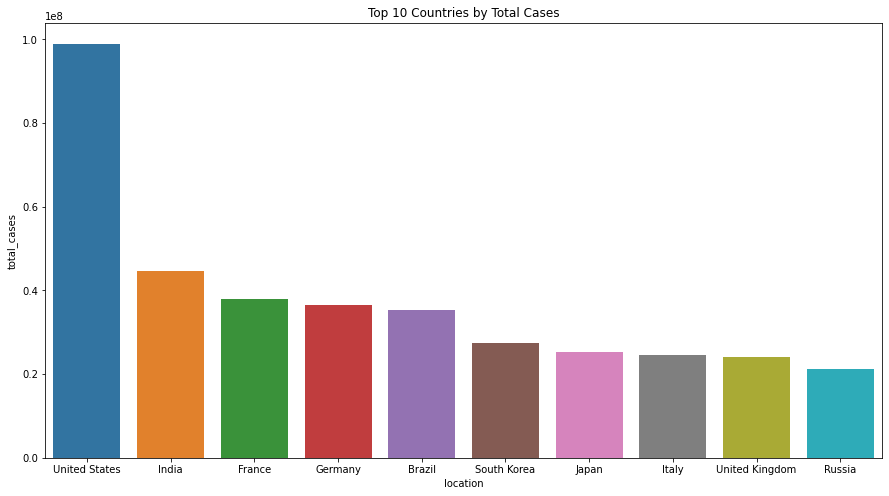

In [36]:
fig, ax = plt.subplots()
t10_case_plot = sns.barplot(data = t10_cases, x = 'location', y = 'total_cases')
fig.set_size_inches(15,8)
plt.title('Top 10 Countries by Total Cases')

Text(0.5, 1.0, 'Top 10 Countries by Cases/million')

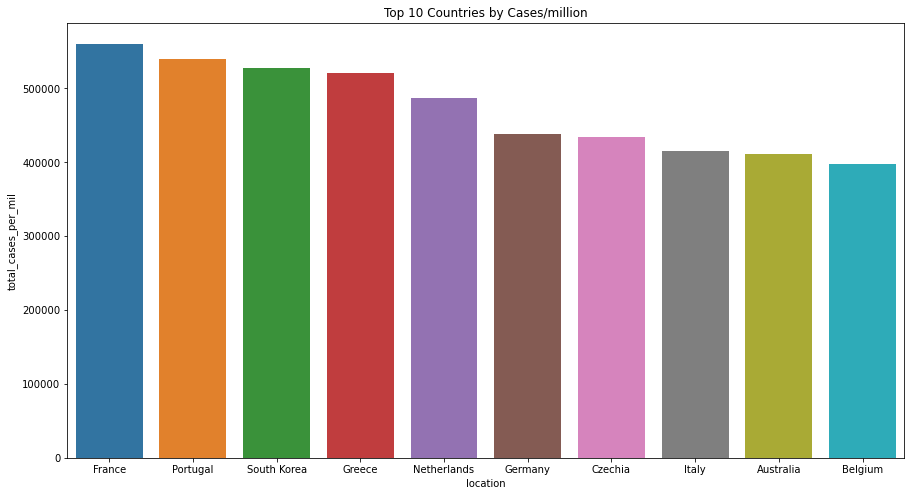

In [37]:
fig, ax = plt.subplots()
t10_caserate_plot = sns.barplot(data = t10_cases_norm, x = 'location', y = 'total_cases_per_mil')
fig.set_size_inches(15,8)
plt.title('Top 10 Countries by Cases/million')

#### Deaths

Text(0.5, 1.0, 'Top 10 Countries by Total Deaths')

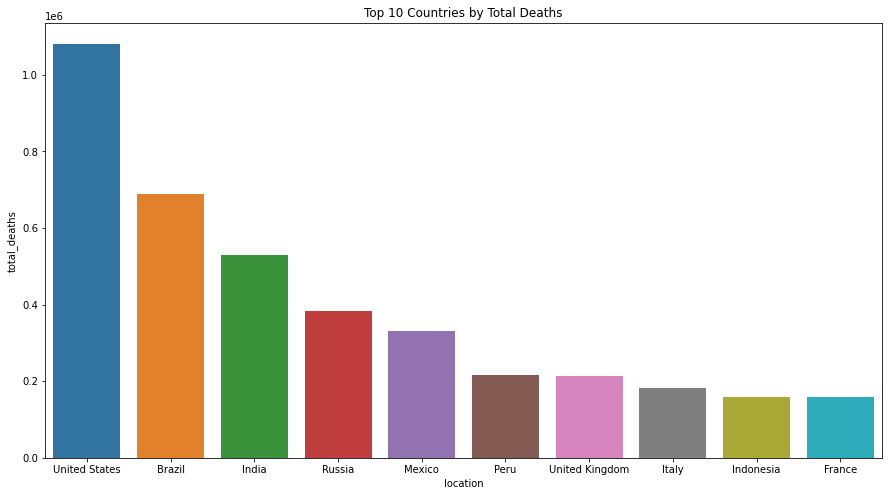

In [38]:
fig, ax = plt.subplots()
t10_death_plot = sns.barplot(data = t10_deaths, x = 'location', y = 'total_deaths')
fig.set_size_inches(15,8)
plt.title('Top 10 Countries by Total Deaths')

Text(0.5, 1.0, 'Top 10 Countries by Deaths/million')

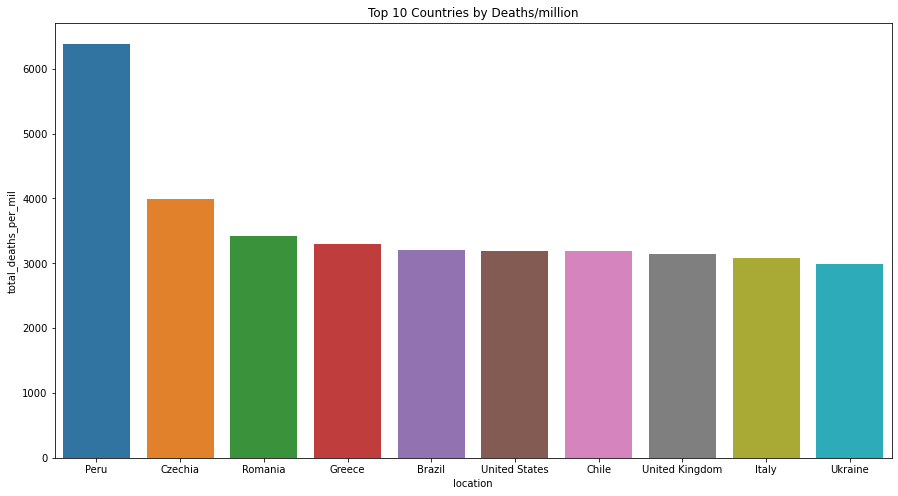

In [39]:
fig, ax = plt.subplots()
t10_deathrate_plot = sns.barplot(data = t10_deaths_norm, x = 'location', y = 'total_deaths_per_mil')
fig.set_size_inches(15,8)
plt.title('Top 10 Countries by Deaths/million')

#### Tests

Text(0.5, 1.0, 'Top 10 Countries by Total Tests')

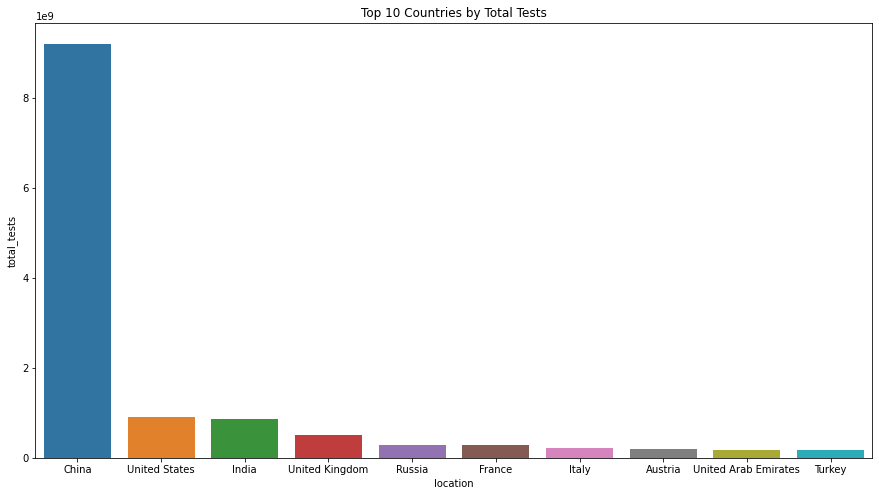

In [40]:
fig, ax = plt.subplots()
t10_test_plot = sns.barplot(data = t10_tests, x = 'location', y = 'total_tests')
fig.set_size_inches(15,8)
plt.title('Top 10 Countries by Total Tests')

Text(0.5, 1.0, 'Top 10 Countries by Total Tests')

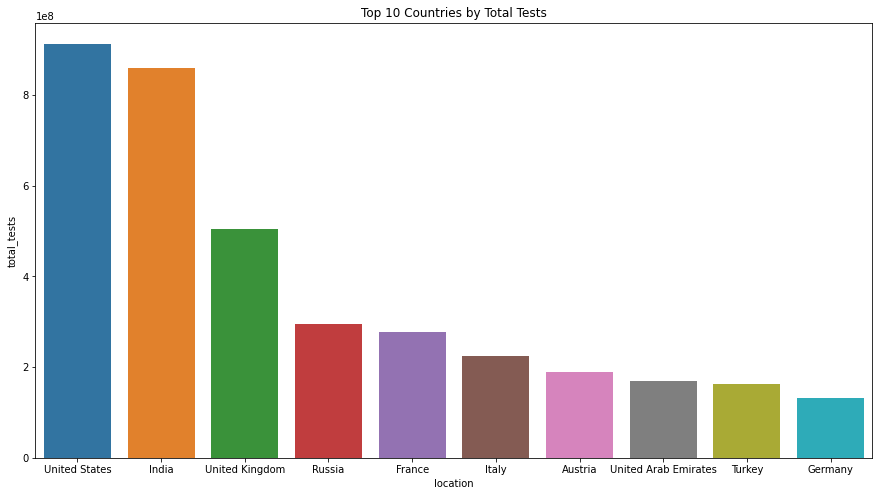

In [41]:
fig, ax = plt.subplots()
t10_test_plot = sns.barplot(data = t10_test_no_china, x = 'location', y = 'total_tests')
fig.set_size_inches(15,8)
plt.title('Top 10 Countries by Total Tests')

Text(0.5, 1.0, 'Top 10 Countries by Total Tests per thousand')

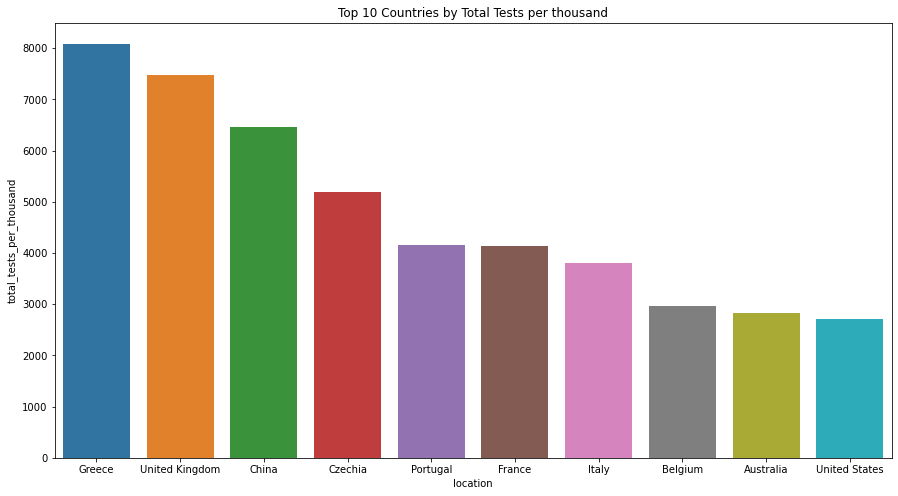

In [42]:
fig, ax = plt.subplots()
t10_testrate_plot = sns.barplot(data = t10_testrate, x = 'location', y = 'total_tests_per_thousand')
fig.set_size_inches(15,8)
plt.title('Top 10 Countries by Total Tests per thousand')

#### Excess Mortality

In [43]:
with pd.option_context('display.max_rows', None,):
    print(mort_agg['location'].value_counts())

Algeria               1
Argentina             1
Malaysia              1
Mexico                1
Netherlands           1
Peru                  1
Philippines           1
Poland                1
Portugal              1
Romania               1
Russia                1
South Africa          1
South Korea           1
Spain                 1
Sweden                1
Taiwan                1
Thailand              1
Tunisia               1
Ukraine               1
United Kingdom        1
United States         1
Kazakhstan            1
Jordan                1
Japan                 1
Cuba                  1
Australia             1
Azerbaijan            1
Belgium               1
Bolivia               1
Brazil                1
Canada                1
Chile                 1
Colombia              1
Czechia               1
Italy                 1
Dominican Republic    1
Ecuador               1
Egypt                 1
France                1
Germany               1
Greece                1
Guatemala       

In [44]:
t10_mort_cu_ab = mort_agg.sort_values(['excess_mortality_cumulative_absolute'], ascending=False)[0:10]
t10_mort_cu = mort_agg.sort_values(['excess_mortality_cumulative'], ascending=False)[0:10]
t10_mort = mort_agg.sort_values(['excess_mortality'], ascending=False)[0:10]
t10_mort_cu_rate = mort_agg.sort_values(['excess_mortality_cumulative_per_million'], ascending=False)[0:10]

Text(0.5, 1.0, 'Top 10 Countries by Cumulative Absolute Excess Mortality')

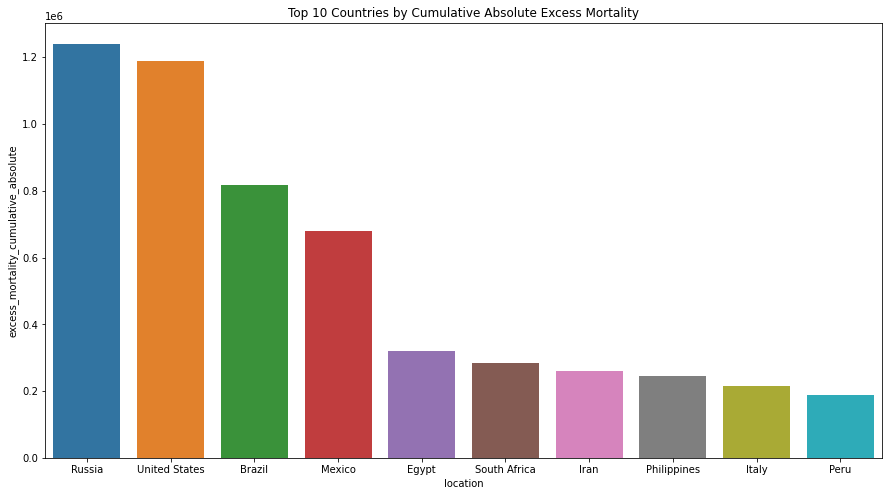

In [45]:
fig, ax = plt.subplots()
mort_cu_ab_plt = sns.barplot(data = t10_mort_cu_ab, x = 'location', y = 'excess_mortality_cumulative_absolute')
fig.set_size_inches(15,8)
plt.title('Top 10 Countries by Cumulative Absolute Excess Mortality')

Text(0.5, 1.0, 'Top 10 Countries by Cumulative Excess Mortality')

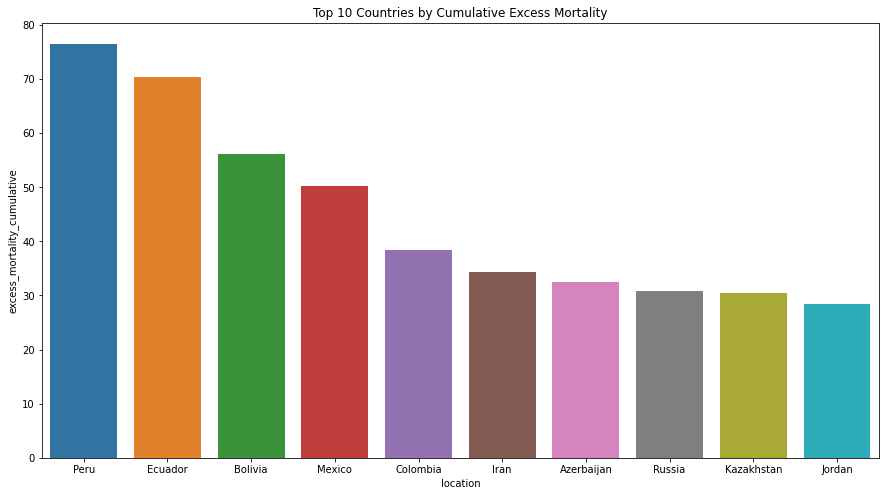

In [46]:
fig, ax = plt.subplots()
mort_cu_plt = sns.barplot(data = t10_mort_cu, x = 'location', y = 'excess_mortality_cumulative')
fig.set_size_inches(15,8)
plt.title('Top 10 Countries by Cumulative Excess Mortality')

Text(0.5, 1.0, 'Top 10 Countries by Excess Mortality')

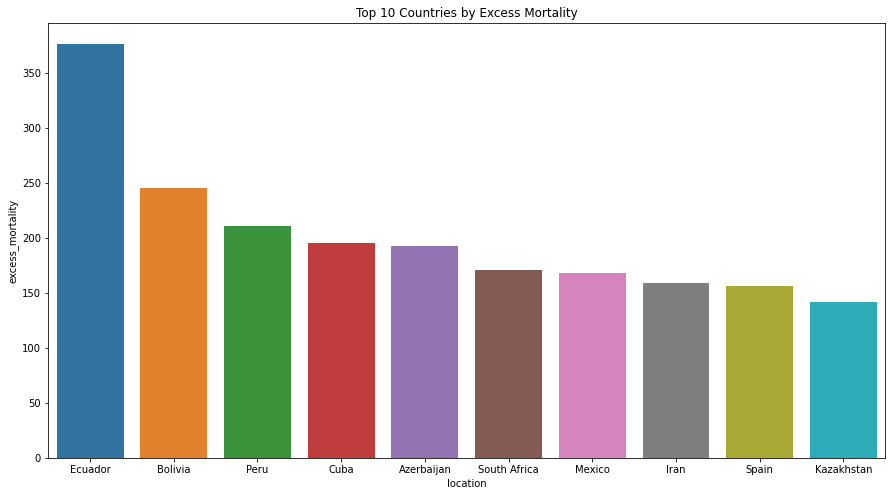

In [47]:
fig, ax = plt.subplots()
mort_plt = sns.barplot(data = t10_mort, x = 'location', y = 'excess_mortality')
fig.set_size_inches(15,8)
plt.title('Top 10 Countries by Excess Mortality')

Text(0.5, 1.0, 'Top 10 Countries by Excess Mortality')

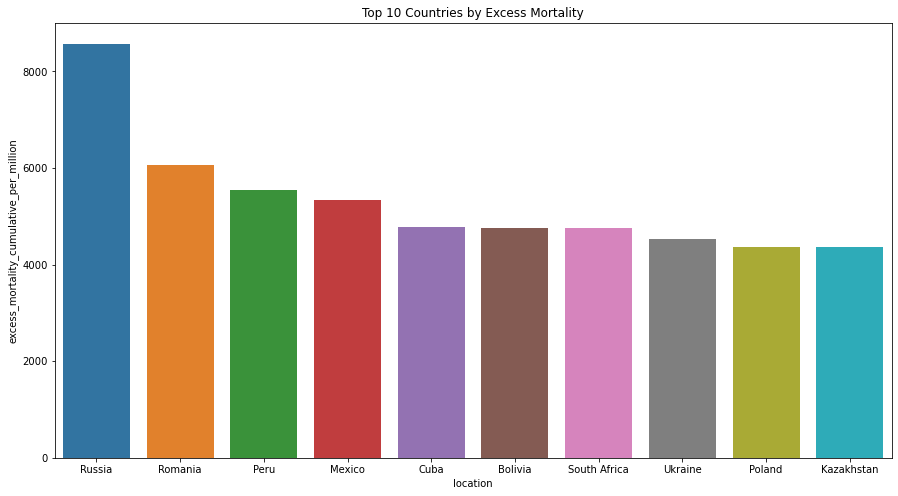

In [48]:
fig, ax = plt.subplots()
mort_cu_rate_plt = sns.barplot(data = t10_mort_cu_rate, x = 'location', y = 'excess_mortality_cumulative_per_million')
fig.set_size_inches(15,8)
plt.title('Top 10 Countries by Excess Mortality')

## Correlation Heatmap

For this I need to create a set of social variables like GDP, pop. density, etc. along with measures of covid deaths/cases.  

In [49]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225719 entries, 0 to 240170
Data columns (total 70 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    225719 non-null  object        
 1   continent                                   225719 non-null  object        
 2   location                                    225719 non-null  object        
 3   date                                        225719 non-null  datetime64[ns]
 4   total_cases                                 212676 non-null  float64       
 5   new_cases                                   212289 non-null  float64       
 6   new_cases_smoothed                          211160 non-null  float64       
 7   total_deaths                                193497 non-null  float64       
 8   new_deaths                                  193228 non-null  float64      

In [50]:
cols = np.r_[5,6,8,9,11,12,14:24, 29:39, 41:47,62:70]

In [51]:
soc = cov.drop(cov.columns[cols],axis=1)


In [52]:
soc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225719 entries, 0 to 240170
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   iso_code                            225719 non-null  object        
 1   continent                           225719 non-null  object        
 2   location                            225719 non-null  object        
 3   date                                225719 non-null  datetime64[ns]
 4   total_cases                         212676 non-null  float64       
 5   total_deaths                        193497 non-null  float64       
 6   total_cases_per_million             212676 non-null  float64       
 7   total_deaths_per_million            193497 non-null  float64       
 8   weekly_hosp_admissions_per_million  19153 non-null   float64       
 9   total_tests                         79323 non-null   float64       
 10  new_test

In [53]:
soc

,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,weekly_hosp_admissions_per_million,total_tests,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,NaN,0.122,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,NaN,0.122,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,NaN,0.122,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,NaN,0.122,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,NaN,0.122,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240166,ZWE,Africa,Zimbabwe,2022-11-30,259164.0,5620.0,15879.623,344.351,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
240167,ZWE,Africa,Zimbabwe,2022-12-01,259164.0,5620.0,15879.623,344.351,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
240168,ZWE,Africa,Zimbabwe,2022-12-02,259164.0,5620.0,15879.623,344.351,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
240169,ZWE,Africa,Zimbabwe,2022-12-03,259164.0,5620.0,15879.623,344.351,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


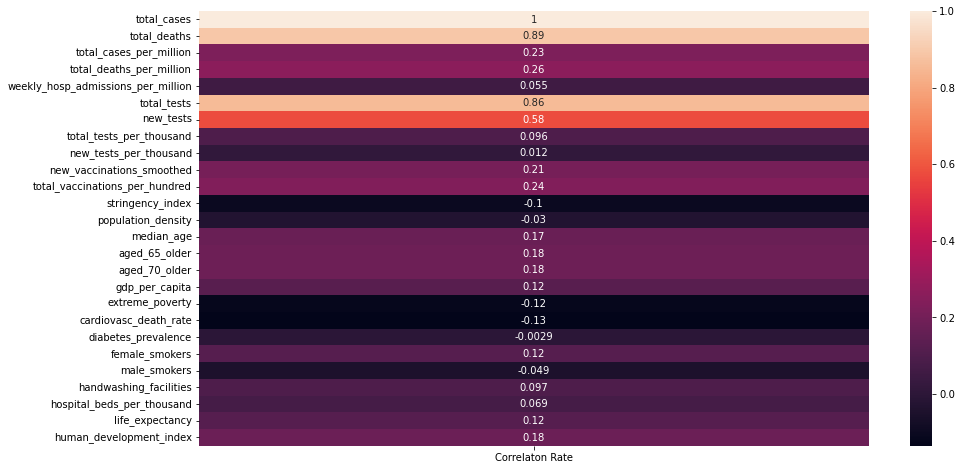

In [54]:
fig, ax = plt.subplots()
heatmap_case = pd.DataFrame({'Correlaton Rate':soc.corr()['total_cases'].values}, 
                            index = soc.corr()['total_cases'].index)
sns.heatmap(heatmap_case, yticklabels=True, annot = True)
fig.set_size_inches(15,8)
plt.show()

In [55]:
cfr_grp

,location,iso_code,total_cases,total_deaths,total_tests,total_cases_per_million,new_cases_per_million_mean,total_deaths_per_million,new_deaths_per_million_mean,stringency_index,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,new_tests,total_tests_per_thousand,total_vaccinations_per_hundred,cfr
0,Afghanistan,AFG,206206.0,7834.0,994894.0,5013.668,4.949531,190.475,0.192976,84.26,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,24.811,29.85,3.799114
1,Albania,ALB,333408.0,3594.0,1613870.0,117301.442,117.184269,1264.461,1.265717,89.81,...,7.1,51.2,NaN,2.89,78.57,0.795,8746.0,565.336,105.95,1.077959
2,Algeria,DZA,271107.0,6881.0,230553.0,6037.584,5.954227,153.241,0.153551,92.13,...,0.7,30.4,83.741,1.90,76.88,0.748,NaN,5.219,34.00,2.538112
3,Andorra,AND,47219.0,157.0,300307.0,591398.119,589.041955,1966.359,2.017672,56.48,...,29.0,37.8,NaN,NaN,83.73,0.868,NaN,3799.719,193.34,0.332493
4,Angola,AGO,104676.0,1924.0,1618566.0,2941.246,2.983008,54.062,0.055171,90.74,...,NaN,NaN,26.664,NaN,61.15,0.581,13038.0,46.910,65.27,1.838053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,WLF,3415.0,7.0,NaN,294498.103,379.019444,603.656,0.967401,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,154.87,0.204978
230,Western Sahara,ESH,NaN,NaN,3943.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,70.26,NaN,NaN,6.972,NaN,NaN
231,Yemen,YEM,11945.0,2159.0,336937.0,354.487,0.366230,64.072,0.067526,64.81,...,7.6,29.2,49.542,0.70,66.12,0.470,NaN,10.216,3.68,18.074508
232,Zambia,ZMB,333746.0,4019.0,3514038.0,16672.570,16.807031,200.773,0.205545,70.83,...,3.1,24.7,13.938,2.00,63.89,0.584,16774.0,180.456,60.68,1.204209


### Soc Cases and Deaths maps

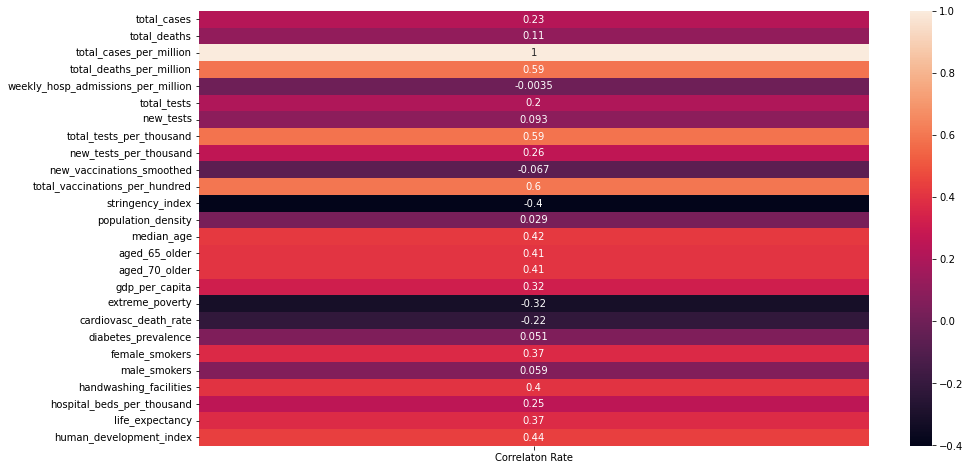

In [56]:

fig, ax = plt.subplots()
heatmap_case_rate = pd.DataFrame({'Correlaton Rate':soc.corr()['total_cases_per_million'].values}, 
                            index = soc.corr()['total_cases_per_million'].index)
sns.heatmap(heatmap_case_rate, yticklabels=True, annot = True)
fig.set_size_inches(15,8)
plt.show()

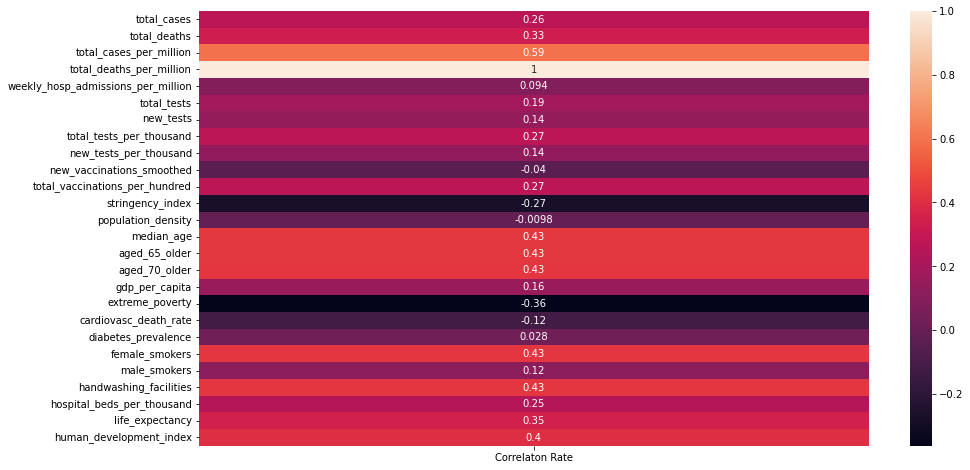

In [57]:
fig, ax = plt.subplots()
heatmap_death_rate = pd.DataFrame({'Correlaton Rate':soc.corr()['total_deaths_per_million'].values},
                                  index = soc.corr()['total_deaths_per_million'].index)
sns.heatmap(heatmap_death_rate, yticklabels=True, annot = True)
fig.set_size_inches(15,8)
plt.show()

<AxesSubplot:xlabel='male_smokers', ylabel='total_deaths_per_million'>

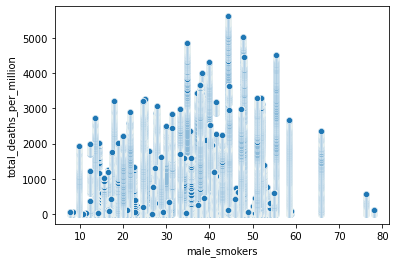

In [58]:
sns.scatterplot(data = soc, x = 'male_smokers', y = 'total_deaths_per_million')

In [59]:
deaths_mil_corr = pd.DataFrame({'Correlaton Rate':soc.corr()['total_deaths_per_million'].values},
                                  index = soc.corr()['total_deaths_per_million'].index)
cases_mil_corr = pd.DataFrame({'Correlaton Rate':soc.corr()['total_cases_per_million'].values}, 
                            index = soc.corr()['total_cases_per_million'].index)
deaths_mil_corr.to_csv(os.path.join(path, '02 Data', 'Processed', 'death_mil_corr.csv'))
cases_mil_corr.to_csv(os.path.join(path, '02 Data', 'Processed', 'case_mil_corr.csv'))


In [60]:
cases_mil_corr

,Correlaton Rate
total_cases,0.227996
total_deaths,0.110155
total_cases_per_million,1.000000
total_deaths_per_million,0.591951
weekly_hosp_admissions_per_million,-0.003502
total_tests,0.202697
new_tests,0.092792
total_tests_per_thousand,0.587086
new_tests_per_thousand,0.258441
new_vaccinations_smoothed,-0.067390


### Max Value corr map

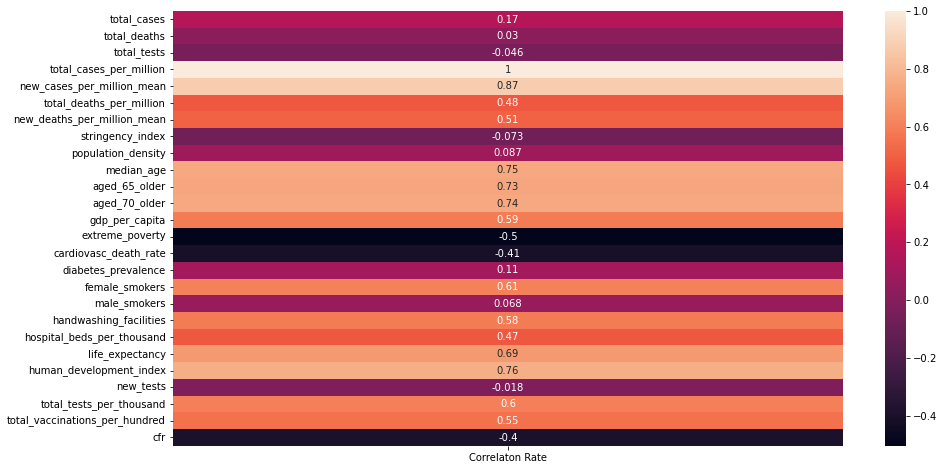

In [61]:

fig, ax = plt.subplots()
heatmap_case_rate = pd.DataFrame({'Correlaton Rate':cfr_grp.corr()['total_cases_per_million'].values}, 
                            index = cfr_grp.corr()['total_cases_per_million'].index)
sns.heatmap(heatmap_case_rate, yticklabels=True, annot = True)
fig.set_size_inches(15,8)
plt.show()



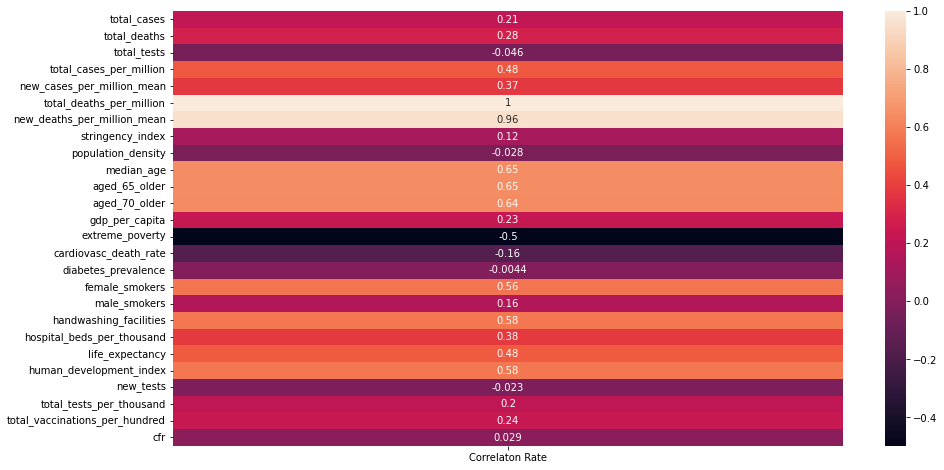

In [62]:

fig, ax = plt.subplots()
heatmap_case_rate = pd.DataFrame({'Correlaton Rate':cfr_grp.corr()['total_deaths_per_million'].values}, 
                            index = cfr_grp.corr()['total_deaths_per_million'].index)
sns.heatmap(heatmap_case_rate, yticklabels=True, annot = True)
fig.set_size_inches(15,8)
plt.show()


In [63]:
deaths_mil_max_corr = pd.DataFrame({'Correlaton Rate':cfr_grp.corr()['total_deaths_per_million'].values}, 
                            index = cfr_grp.corr()['total_deaths_per_million'].index)
deaths_mil_max_corr.to_csv(os.path.join(path, '02 Data', 'Processed', 'death_mil_max_corr.csv'))

In [64]:
cases_mil_max_corr = pd.DataFrame({'Correlaton Rate':cfr_grp.corr()['total_cases_per_million'].values}, 
                            index = cfr_grp.corr()['total_cases_per_million'].index)
cases_mil_max_corr.to_csv(os.path.join(path, '02 Data', 'Processed', 'case_mil_max_corr.csv'))

<AxesSubplot:xlabel='aged_65_older', ylabel='total_deaths_per_million'>

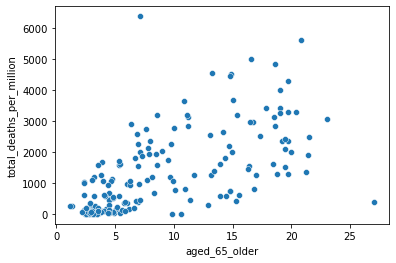

In [65]:
sns.scatterplot(data = cfr_grp, x = 'aged_65_older', y = 'total_deaths_per_million')

<AxesSubplot:xlabel='aged_65_older', ylabel='total_deaths_per_million'>

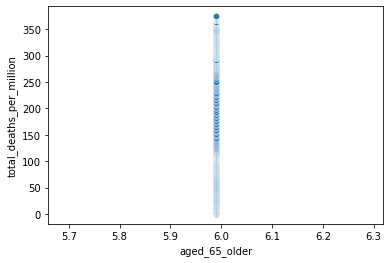

In [66]:
sns.scatterplot(data = (cov.loc[cov['location'] == 'India']), x = 'aged_65_older', y = 'total_deaths_per_million')

In [67]:
deaths_mil_corr.to_csv(os.path.join(path, '02 Data', 'Processed', 'death_mil_corr.csv'))

In [68]:
deaths_mil_corr.to_csv(os.path.join(path, '02 Data', 'Processed', 'death_mil_corr.csv'))

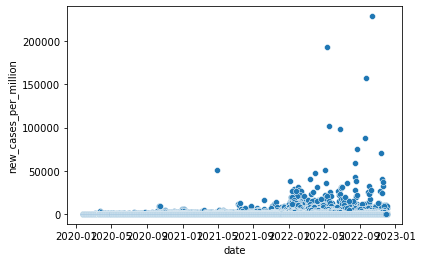

In [69]:
fig, ax = plt.subplots()
casesplt = sns.scatterplot(x = cov['date'], y='new_cases_per_million', data=cov)

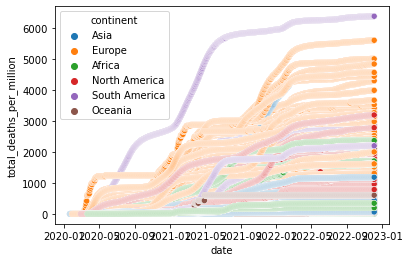

In [70]:
fig, ax = plt.subplots()
deathsplt = sns.scatterplot(x = cov['date'], y='total_deaths_per_million', data=cov, hue = 'continent')

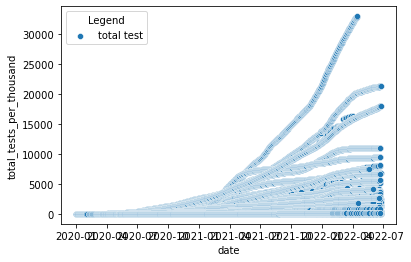

In [71]:
fig, ax = plt.subplots()
testsplt = sns.scatterplot(x = cov['date'], y='total_tests_per_thousand', data=cov)
plt.legend(labels=["total test"], title = "Legend")

In [72]:
# Ax method
# https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn
fig.set_size_inches(10,8)

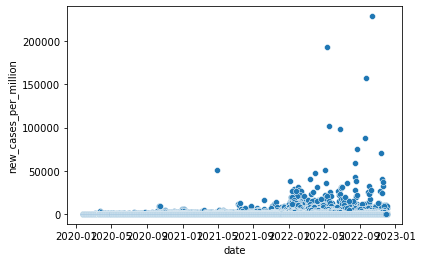

In [73]:
casesplt.figure

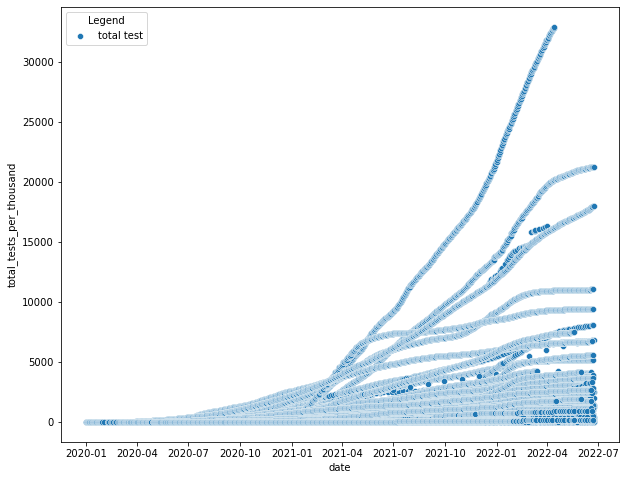

In [74]:
testsplt.figure

<AxesSubplot:xlabel='date', ylabel='hosp_patients'>

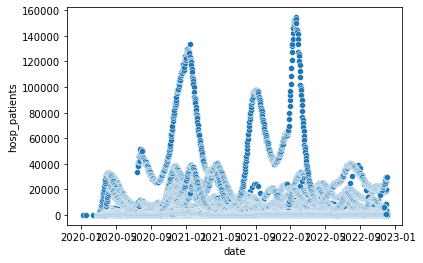

In [75]:
sns.scatterplot(x=cov['date'], y='hosp_patients', data=cov)

<AxesSubplot:xlabel='date', ylabel='hosp_patients'>

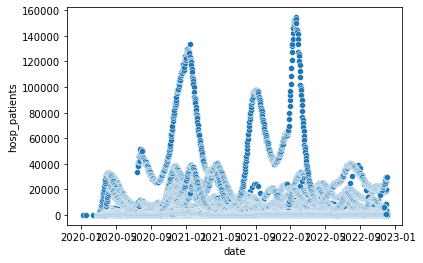

In [76]:
 sns.scatterplot(x=cov['date'], y='hosp_patients', data=cov)

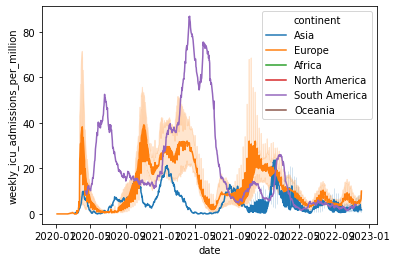

In [77]:
icu = sns.lineplot(x=cov['date'], y='weekly_icu_admissions_per_million', data=cov,
                hue = 'continent')

<AxesSubplot:xlabel='continent', ylabel='total_deaths_per_million'>

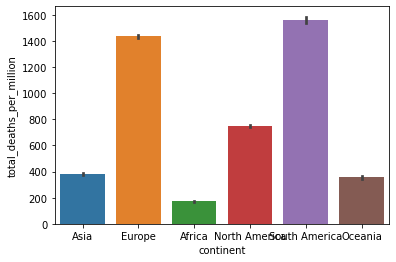

In [78]:
sns.barplot(x=cov['continent'], y='total_deaths_per_million', data=cov)

<AxesSubplot:xlabel='continent', ylabel='total_cases_per_million'>

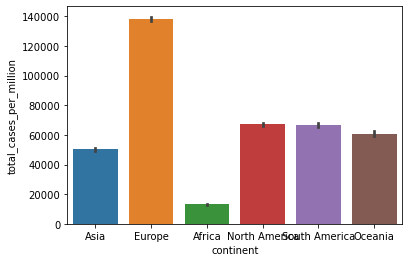

In [79]:
sns.barplot(x=cov['continent'], y='total_cases_per_million', data=cov)

<AxesSubplot:xlabel='continent', ylabel='total_tests_per_thousand'>

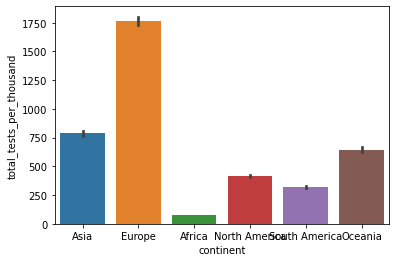

In [80]:
sns.barplot(x=cov['continent'], y='total_tests_per_thousand', data=cov)

<AxesSubplot:xlabel='stringency_index', ylabel='total_deaths_per_million'>

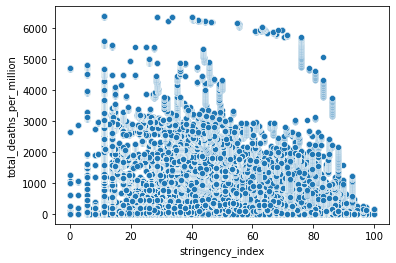

In [81]:
sns.scatterplot(x=cov['stringency_index'], y='total_deaths_per_million', data=cov)

<AxesSubplot:xlabel='hospital_beds_per_thousand', ylabel='total_deaths_per_million'>

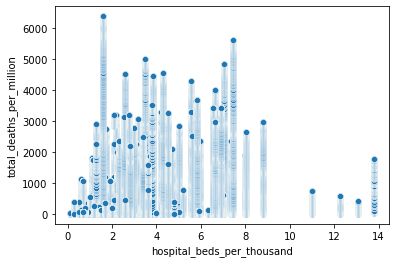

In [82]:
sns.scatterplot(x=cov['hospital_beds_per_thousand'], y='total_deaths_per_million', data=cov)

<AxesSubplot:xlabel='cardiovasc_death_rate', ylabel='total_deaths_per_million'>

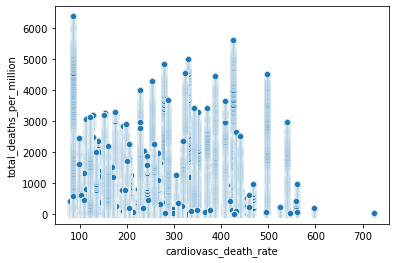

In [83]:
sns.scatterplot(x=cov['cardiovasc_death_rate'], y='total_deaths_per_million', data=cov)

<AxesSubplot:xlabel='weekly_icu_admissions_per_million', ylabel='total_deaths_per_million'>

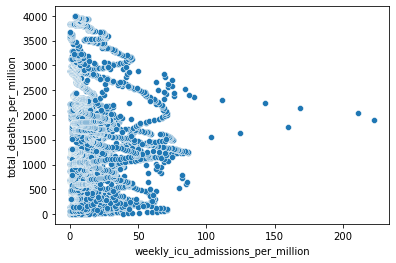

In [84]:
sns.scatterplot(x=cov['weekly_icu_admissions_per_million'], y='total_deaths_per_million', data=cov)

In [85]:
# Set tick range (higher number = more ticks)
# https://stackoverflow.com/questions/38947115/how-to-decrease-the-density-of-x-ticks-in-seaborn
icu.xaxis.set_major_locator(ticker.LinearLocator(9))

## Income

In [86]:
inc.head(2)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,year,month,year_month
0,OWID_HIC,High,2020-01-22,6.0,0.0,NaN,NaN,0.0,NaN,0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,1.250515e+09,2020,1,2020-01-01
1,OWID_HIC,High,2020-01-23,12.0,6.0,NaN,NaN,0.0,NaN,0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,1.250515e+09,2020,1,2020-01-01


In [87]:
inc['location'].value_counts()

High            1048
Lower middle    1048
Upper middle    1048
Low             1016
Name: location, dtype: int64

<AxesSubplot:xlabel='location', ylabel='total_deaths_per_million'>

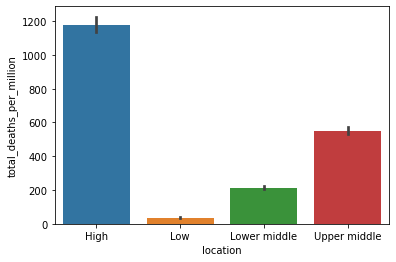

In [88]:
sns.barplot(data = inc, x = 'location', y = 'total_deaths_per_million')

<AxesSubplot:xlabel='location', ylabel='new_deaths_per_million'>

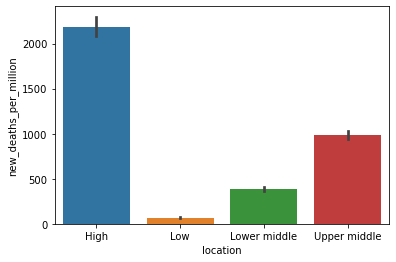

In [89]:
sns.barplot(data = inc, x = 'location', y = 'new_deaths_per_million', estimator = np.sum)

<AxesSubplot:xlabel='location', ylabel='total_cases_per_million'>

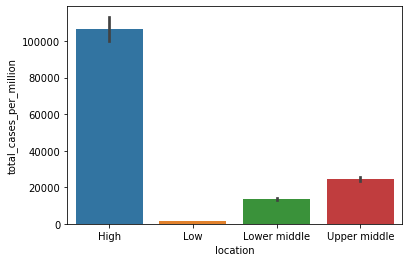

In [90]:
sns.barplot(data = inc, x = 'location', y = 'total_cases_per_million')